Table maker

In [21]:
import json
from pathlib import Path

import pandas as pd
from matplotlib import pyplot as plt

results_dir = Path(".", "results")
scaling_transformations = set([str(file).split("_")[1] for file in list(results_dir.glob("*.json"))])
scaling_transformations

{'MaxAbsScaler',
 'MinMaxScaler',
 'QuantileTransformer',
 'RobustScaler',
 'StandardScaler'}

Table with results for each scaler

C:\Users\xr72\AppData\Local\Temp\ipykernel_44672\1741517641.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


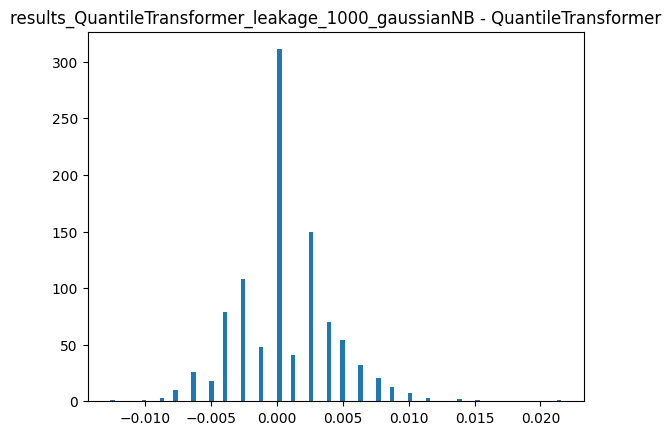

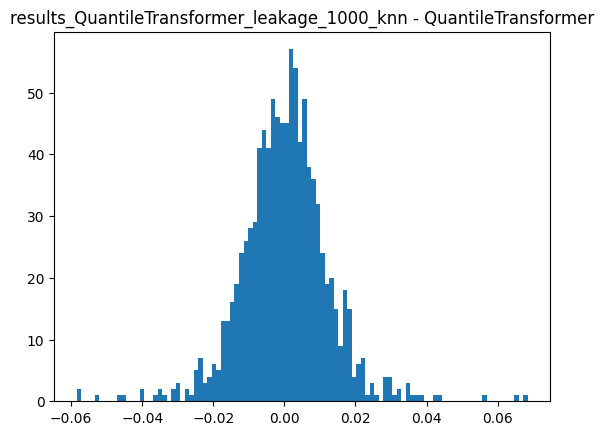

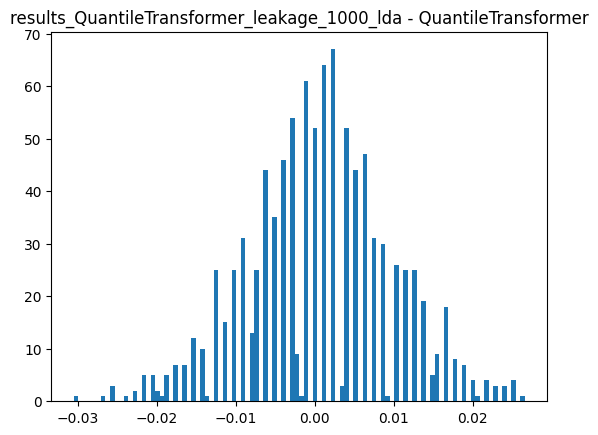

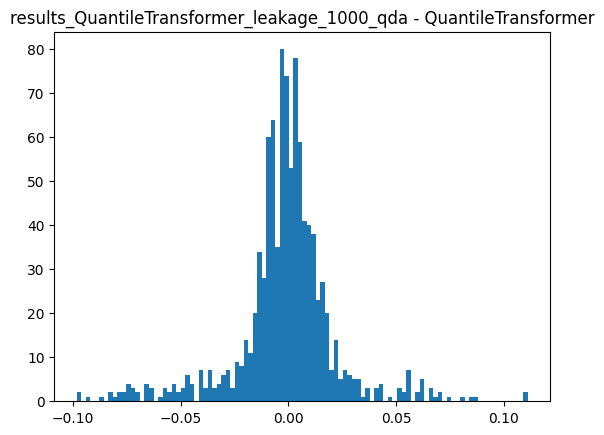

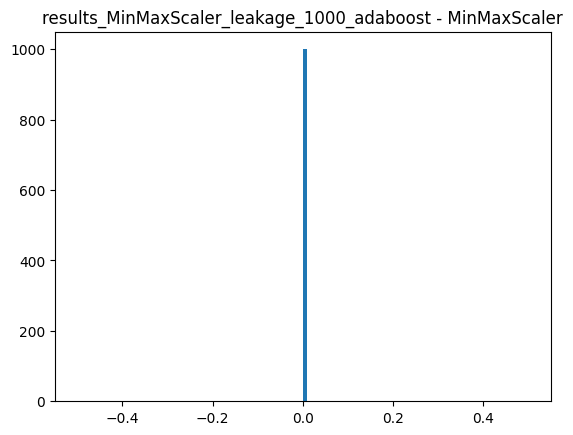

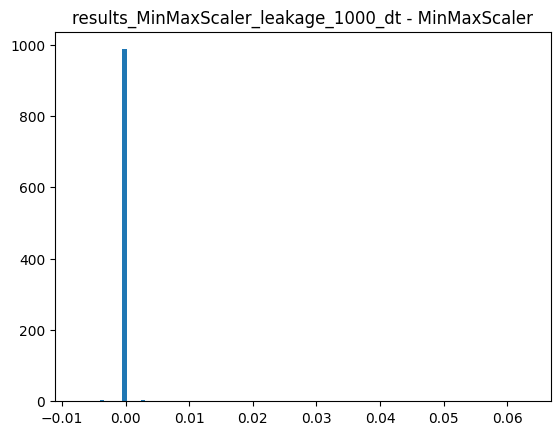

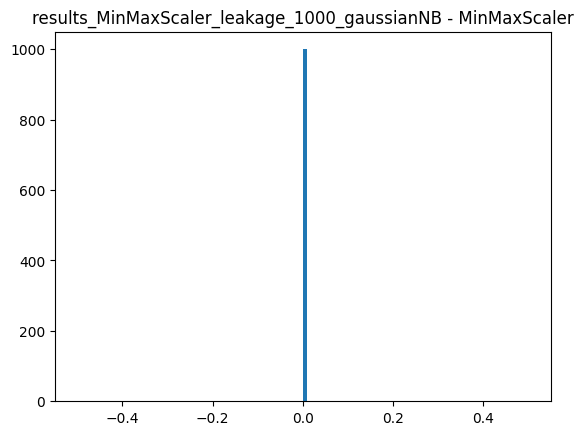

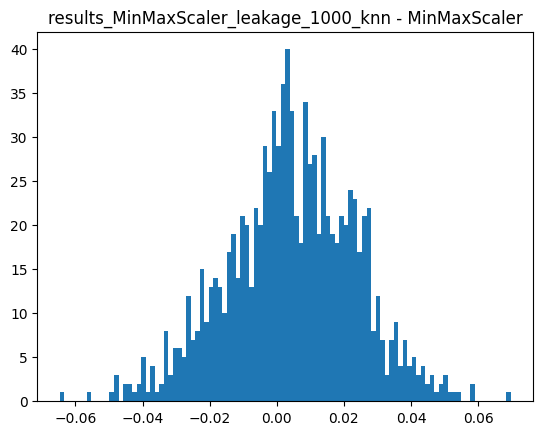

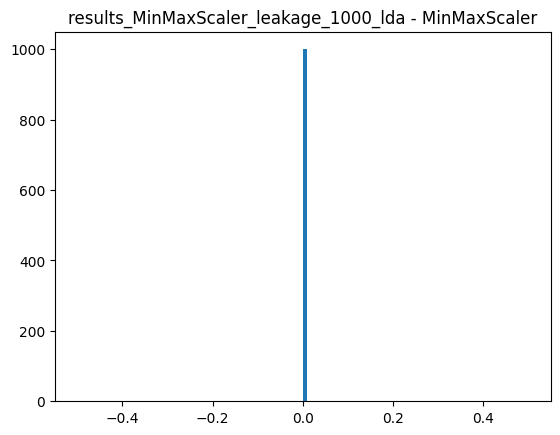

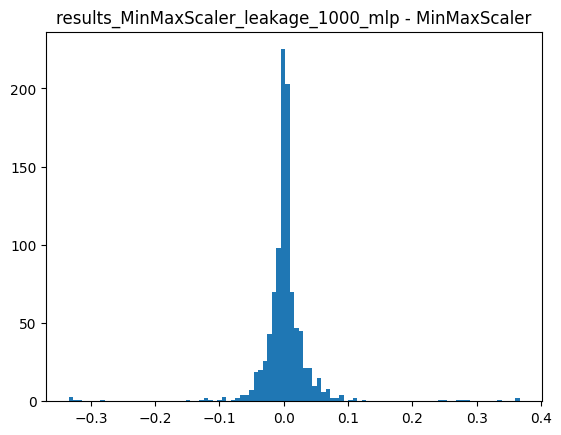

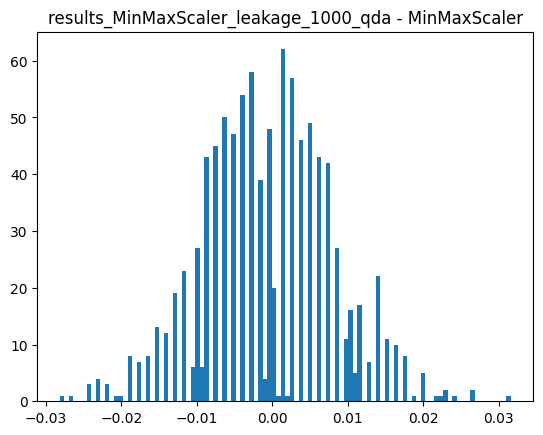

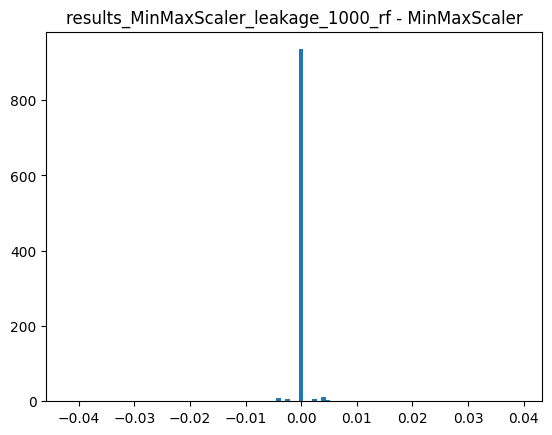

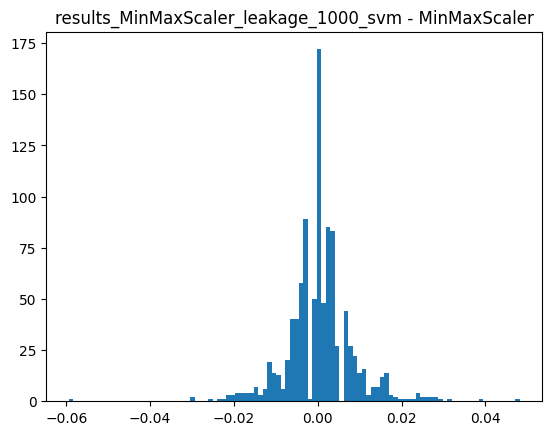

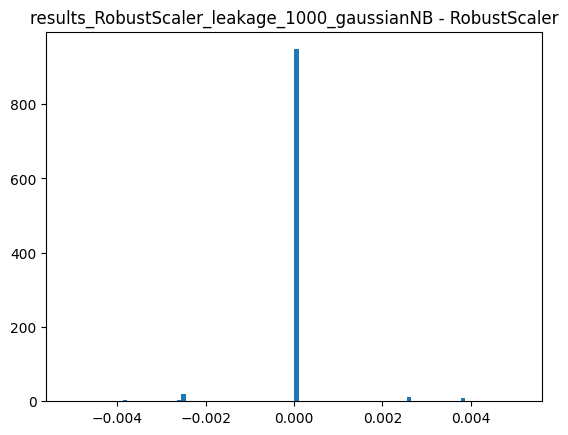

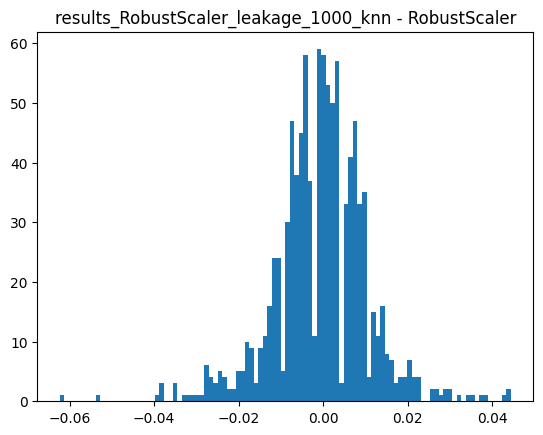

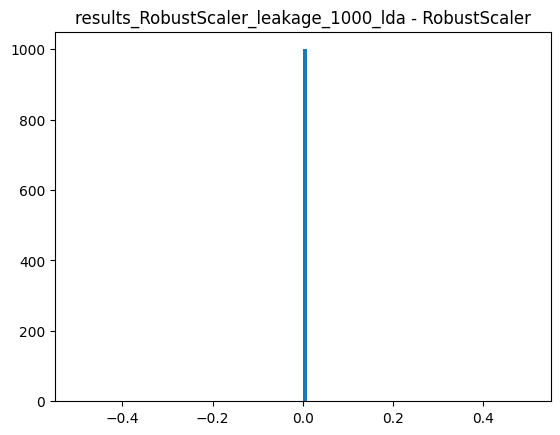

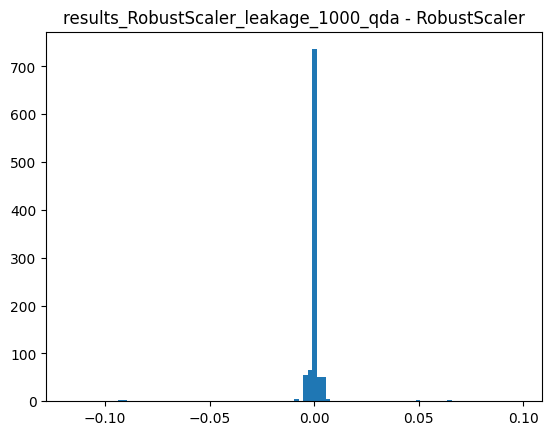

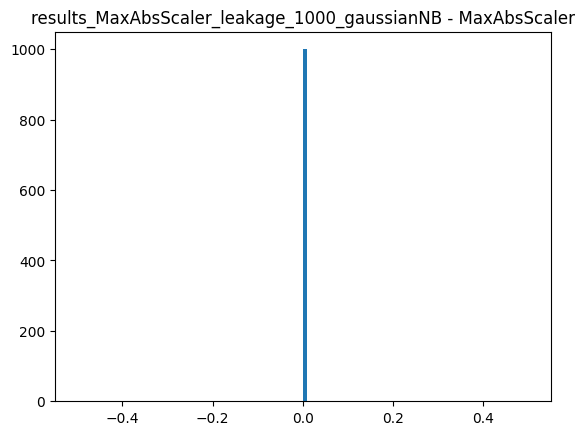

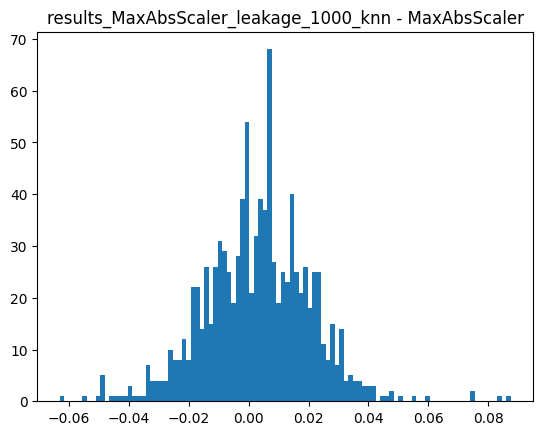

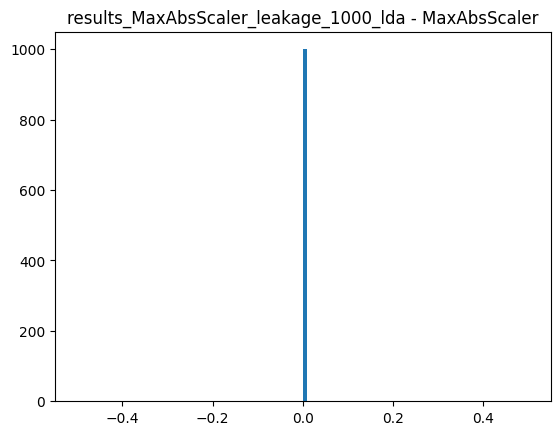

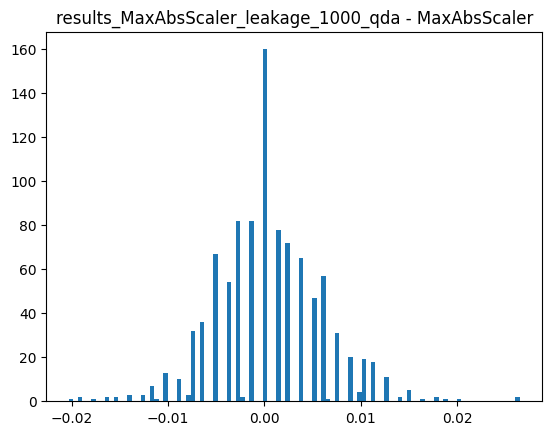

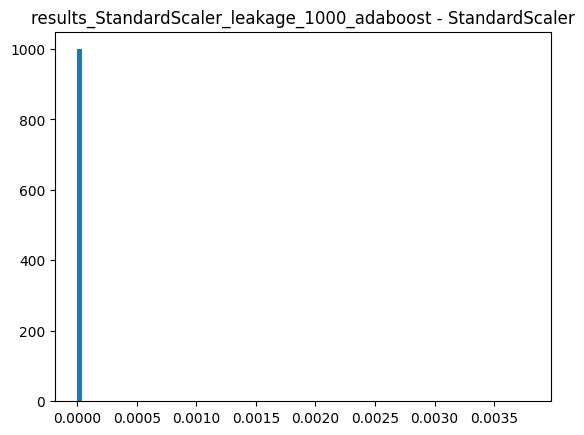

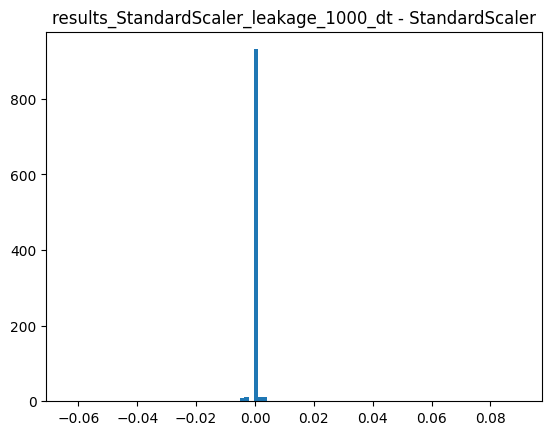

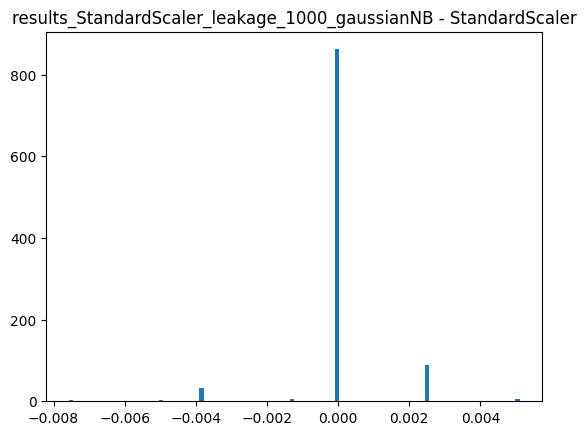

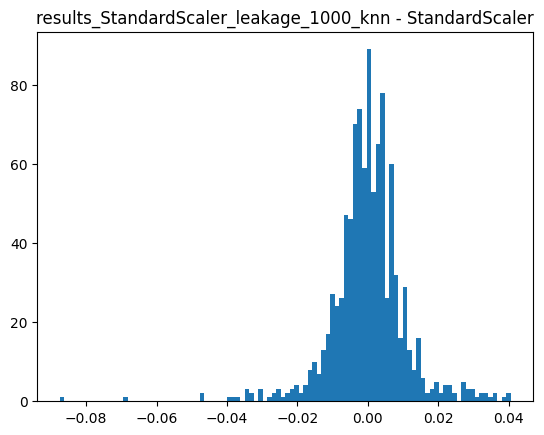

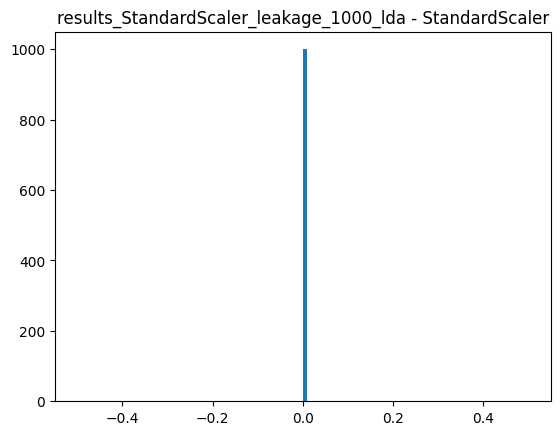

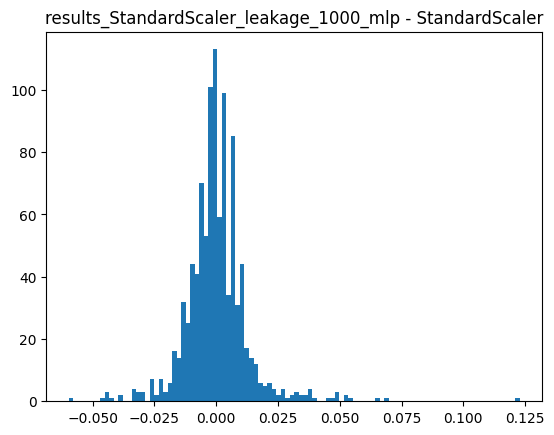

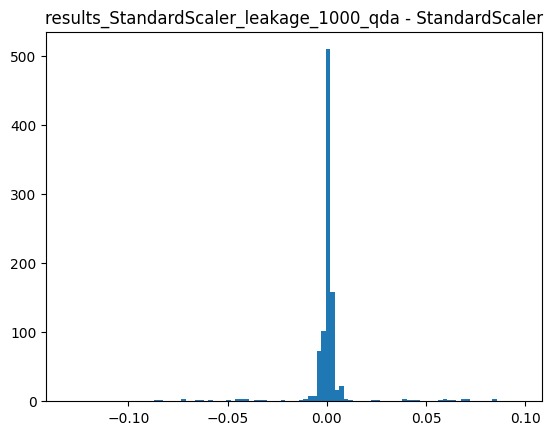

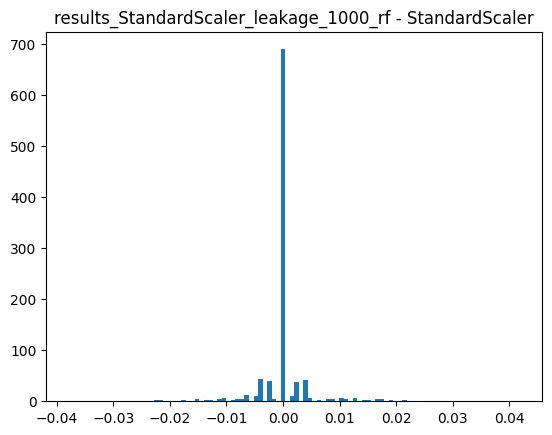

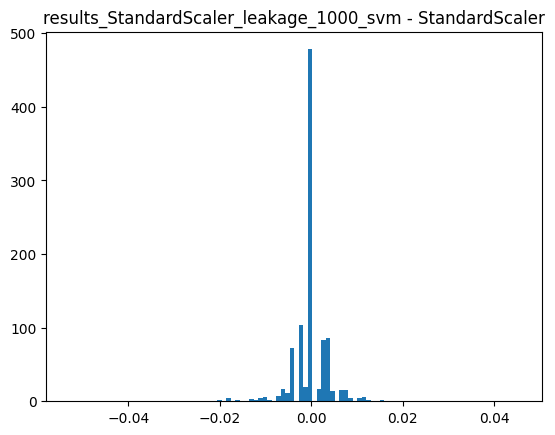

In [22]:
pandas_tables = []
for scaler in scaling_transformations:
    scaler_table = {"classifier": [],
                    "maxdiff": [],
                    "mindiff": [],
                    "meandiff": [],
                    "stddiff": []}
    for result in results_dir.glob(f"*{scaler}*"):
        with open(result, "r") as f:
            clf_results = json.load(f)
            to_pandas = {"seed": [], "bcc_correct": [], "bcc_leakage": []}
            for seed_experiment in clf_results.keys():
                to_pandas["seed"].append(int(seed_experiment))
                to_pandas["bcc_correct"].append(clf_results[seed_experiment]["bcc"]["correct"])
                to_pandas["bcc_leakage"].append(clf_results[seed_experiment]["bcc"]["leakage"])

            pd_data = pd.DataFrame(to_pandas)
            scaler_table["classifier"].append(str(result.stem).split("_")[4])
            diff = pd_data["bcc_leakage"] - pd_data["bcc_correct"]
            plt.figure()
            plt.hist(diff, bins=100)
            plt.title(f"{result.stem} - {scaler}")

            scaler_table["maxdiff"].append(diff.max())
            scaler_table["mindiff"].append(diff.min())
            scaler_table["meandiff"].append(diff.mean())
            scaler_table["stddiff"].append(diff.std())
        pd_to_dump = pd.DataFrame(scaler_table).to_csv(f"scaler_{scaler}.csv")
plt.show()